<a href="https://colab.research.google.com/github/sophiaperaza/Researchmethodsassignment/blob/main/FINAL_SPB_JUPYTERNOTEBOOK_2_IPYNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
import plotly.express as px
print('successfully loaded packages')


successfully loaded packages


This is the link for the data frame column descriptions:
https://chronicdata.cdc.gov/Vision-Eye-Health/Commercial-Medical-Insurance-MSCANCC-Vision-and-Ey/a35h-9yn4



In [ ]:
url4= 'https://chronicdata.cdc.gov/resource/a35h-9yn4.csv'

In [ ]:
df4= pd.read_csv(url4)
df4

,yearstart,yearend,locationabbr,locationdesc,datasource,topic,category,question,response,age,gender,raceethnicity,riskfactor,riskfactorresponse,data_value_unit,data_value_type,data_value,data_value_footnote_symbol,data_value_footnote,low_confidence_limit,high_confidence_limit,numerator,sample_size,locationid,topicid,categoryid,questionid,responseid,datavaluetypeid,ageid,genderid,raceethnicityid,riskfactorid,riskfactorresponseid,geolocation
0,2016,2016,NY,New York,MSCANCC,Eye Health Conditions,Glaucoma,Annual prevalence of treated glaucoma,Congenital glaucoma,0-17 years,Female,All races,Hypertension,Yes,%,Crude Prevalence,0.00,NaN,NaN,0.00,0.74,0.0,500.0,36,TCOND,CDXC5,QDXC5,R5_7,CRDPREV,AGE017,GF,ALLRACE,RFHT,RFYES,POINT (-75.54397043 42.82700103)
1,2016,2016,AK,Alaska,MSCANCC,Eye Health Conditions,Glaucoma,Annual prevalence of treated glaucoma,Secondary glaucoma,All ages,Female,All races,Diabetes,Yes,%,Crude Prevalence,0.00,NaN,NaN,0.00,0.92,0.0,400.0,2,TCOND,CDXC5,QDXC5,R5_10,CRDPREV,AGEALL,GF,ALLRACE,RFDM,RFYES,POINT (-147.722059 64.84507996)
2,2016,2016,VT,Vermont,MSCANCC,Eye Health Conditions,Cataracts,Annual prevalence of treated cataracts,Senile cataract,0-17 years,Male,All races,Diabetes,No,%,Crude Prevalence,0.00,NaN,NaN,0.00,0.22,0.0,1700.0,50,TCOND,CDXC6,QDXC6,R6_1,CRDPREV,AGE017,GM,ALLRACE,RFDM,RFNO,POINT (-72.51764079 43.62538124)
3,2016,2016,US,National,MSCANCC,Eye Health Conditions,Cataracts,Annual prevalence of treated cataracts,Aphakia and disorders of lens,All ages,Female,All races,All patients,Total,%,Crude Prevalence,0.02,NaN,NaN,0.02,0.02,3000.0,14874100.0,59,TCOND,CDXC6,QDXC6,R6_6,CRDPREV,AGEALL,GF,ALLRACE,RFALL,RFTOT,NaN
4,2016,2016,XX,Missing Location,MSCANCC,Eye Health Conditions,Cataracts,Annual prevalence of treated cataracts,Senile cataract,18-39 years,All genders,All races,Diabetes,No,%,Crude Prevalence,0.04,NaN,NaN,0.02,0.07,0.0,38100.0,99,TCOND,CDXC6,QDXC6,R6_1,CRDPREV,AGE1839,GALL,ALLRACE,RFDM,RFNO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2016,2016,MT,Montana,MSCANCC,Eye Health Conditions,Orbital and External Disease,Annual prevalence of treated orbital and exter...,Dry eye syndrome,All ages,All genders,All races,Hypertension,Yes,%,Crude Prevalence,1.96,NaN,NaN,1.47,2.56,100.0,2700.0,30,TCOND,CDXC14,QDXC14,R14_5,CRDPREV,AGEALL,GALL,ALLRACE,RFHT,RFYES,POINT (-109.4244206 47.06652897)
996,2016,2016,FL,Florida,MSCANCC,Eye Health Conditions,Cataracts,Annual prevalence of treated cataracts,Non-congenital cataract,All ages,Female,All races,Hypertension,Yes,%,Crude Prevalence,0.79,NaN,NaN,0.75,0.84,1200.0,147100.0,12,TCOND,CDXC6,QDXC6,R6_2,CRDPREV,AGEALL,GF,ALLRACE,RFHT,RFYES,POINT (-81.92896054 28.93204038)
997,2016,2016,WA,Washington,MSCANCC,Eye Health Conditions,Infectious and Inflammatory Diseases,Annual prevalence of treated infectious and in...,Infectious diseases,40-64 years,Male,All races,All patients,Total,%,Crude Prevalence,0.21,NaN,NaN,0.18,0.24,200.0,115800.0,53,TCOND,CDXC13,QDXC13,R13_1,CRDPREV,AGE4064,GM,ALLRACE,RFALL,RFTOT,POINT (-120.4700108 47.52227863)
998,2016,2016,MS,Mississippi,MSCANCC,Service Utilization,Cataract Surgery,Percentage of people with diagnosed cataract w...,Any cataract treatment,All ages,Male,All races,Diabetes,No,%,Crude Prevalence,0.20,NaN,NaN,0.18,0.22,300.0,150200.0,28,TUTL,CCATS,QCATS,RCATANY,CRDPREV,AGEALL,GM,ALLRACE,RFDM,RFNO,POINT (-89.53803082 32.7455101)


## 1.Potential IV / DV

In [ ]:
df4.shape
## Here we can see the number of rows and columns 

(1000, 35)

In [ ]:
df4.info()
#this provides an overview of column names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yearstart                   1000 non-null   int64  
 1   yearend                     1000 non-null   int64  
 2   locationabbr                1000 non-null   object 
 3   locationdesc                1000 non-null   object 
 4   datasource                  1000 non-null   object 
 5   topic                       1000 non-null   object 
 6   category                    1000 non-null   object 
 7   question                    1000 non-null   object 
 8   response                    1000 non-null   object 
 9   age                         1000 non-null   object 
 10  gender                      1000 non-null   object 
 11  raceethnicity               1000 non-null   object 
 12  riskfactor                  1000 non-null   object 
 13  riskfactorresponse          1000 n

In [ ]:
list(df4)
#an alternative to get column names in a list 

['yearstart',
 'yearend',
 'locationabbr',
 'locationdesc',
 'datasource',
 'topic',
 'category',
 'question',
 'response',
 'age',
 'gender',
 'raceethnicity',
 'riskfactor',
 'riskfactorresponse',
 'data_value_unit',
 'data_value_type',
 'data_value',
 'data_value_footnote_symbol',
 'data_value_footnote',
 'low_confidence_limit',
 'high_confidence_limit',
 'numerator',
 'sample_size',
 'locationid',
 'topicid',
 'categoryid',
 'questionid',
 'responseid',
 'datavaluetypeid',
 'ageid',
 'genderid',
 'raceethnicityid',
 'riskfactorid',
 'riskfactorresponseid',
 'geolocation']

In [ ]:
# Checking list of prevalence (%)  
# list(df4.data_value)

In [ ]:
#reorganizing the columns for the most relevant information
df4.sample(20)[['locationabbr','age','gender','question','category','response','riskfactor','sample_size','numerator','data_value']].head(20)

,locationabbr,age,gender,question,category,response,riskfactor,sample_size,numerator,data_value
680,WA,18-39 years,All genders,Percentage of people with diagnosed glaucoma w...,Treatment for glaucoma,Any glaucoma treatment,Hypertension,6200.0,0.0,0.02
684,AK,18-39 years,All genders,Annual prevalence of treated cornea disorders,Cornea Disorders,Keratoconus,Diabetes,200.0,0.0,0.00
998,MS,All ages,Male,Percentage of people with diagnosed cataract w...,Cataract Surgery,Any cataract treatment,Diabetes,150200.0,300.0,0.20
852,AK,0-17 years,All genders,Annual prevalence of treated retinal detachmen...,Retinal Detachment and Defects,All Retinal detachment and defects,Hypertension,NaN,NaN,NaN
264,US,0-17 years,All genders,Annual prevalence of treated glaucoma,Glaucoma,Primary open-angle glaucoma,Diabetes,6701600.0,0.0,0.00
793,ID,18-39 years,Male,Annual prevalence of treated cornea disorders,Cornea Disorders,Keratoconus,Diabetes,1100.0,0.0,0.47
996,FL,All ages,Female,Annual prevalence of treated cataracts,Cataracts,Non-congenital cataract,Hypertension,147100.0,1200.0,0.79
791,OR,40-64 years,Male,Annual prevalence of treated age related macul...,Age Related Macular Degeneration,Early stage age-related macular degeneration,All patients,60300.0,100.0,0.19
123,US,All ages,Male,Annual prevalence of treated diabetic eye dise...,Diabetic Eye Diseases,Diabetic macular edema,Hypertension,11794700.0,3500.0,0.03
881,WI,40-64 years,Female,Annual prevalence of treated other retinal dis...,Other Retinal Disorders,Macular edema (not diabetic),Diabetes,122800.0,100.0,0.06


Potential IV : age, gender, risk factor


Potential DV : data_value(which represents prevalence(%), numerator(which represents number of patients with condition)

## 2. Missing Data



In [ ]:
df4['data_value'].isnull().value_counts()

False    945
True      55
Name: data_value, dtype: int64

In [ ]:
#alternative way for do value counts
df4.info('show_counts')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yearstart                   1000 non-null   int64  
 1   yearend                     1000 non-null   int64  
 2   locationabbr                1000 non-null   object 
 3   locationdesc                1000 non-null   object 
 4   datasource                  1000 non-null   object 
 5   topic                       1000 non-null   object 
 6   category                    1000 non-null   object 
 7   question                    1000 non-null   object 
 8   response                    1000 non-null   object 
 9   age                         1000 non-null   object 
 10  gender                      1000 non-null   object 
 11  raceethnicity               1000 non-null   object 
 12  riskfactor                  1000 non-null   object 
 13  riskfactorresponse          1000 n

## 3.Transformations 

In [ ]:
#Transformation 1 : to distinguish high prevalence rates versus low prevalence rates 
df4['data_value_mod'] = ''
df4['data_value_mod']

0       
1       
2       
3       
4       
      ..
995     
996     
997     
998     
999     
Name: data_value_mod, Length: 1000, dtype: object

In [ ]:
for idx, row in df4.iterrows():
  if row['data_value'] >= 1.36:
    df4.loc[idx, 'data_value_mod'] = 'high prevalence'
  else:
    df4.loc[idx, 'data_value_mod'] = 'low prevalence'

In [ ]:
df4.sample(10)[['data_value', 'data_value_mod']]


,data_value,data_value_mod
483,2.12,high prevalence
338,0.11,low prevalence
970,0.01,low prevalence
450,NaN,low prevalence
470,0.00,low prevalence
115,0.75,low prevalence
577,0.01,low prevalence
178,0.02,low prevalence
263,0.01,low prevalence
876,1.17,low prevalence


In [ ]:
## Comparing another value to distinguish high vs. low rates of prevalence 
def rules2(row):
  if row['data_value'] >= 90:
    return 'high prevalence'
  elif row['data_value'] <= 90:
    return 'low prevalence'

In [ ]:
df4['data_value_mod3'] = df4.apply(rules2, 1)

In [ ]:
df4.sample(10)[['data_value','data_value_mod', 'data_value_mod3']]

,data_value,data_value_mod,data_value_mod3
931,NaN,low prevalence,None
173,0.17,low prevalence,low prevalence
686,0.00,low prevalence,low prevalence
190,0.67,low prevalence,low prevalence
943,0.04,low prevalence,low prevalence
44,0.34,low prevalence,low prevalence
681,0.94,low prevalence,low prevalence
254,0.91,low prevalence,low prevalence
251,1.92,high prevalence,low prevalence
844,0.03,low prevalence,low prevalence


In [ ]:
## Transformation 2: Grouping responses into 5 groups: glaucoma, diabetic retinopathy, cataracts, macular degeneration, and other 
df4['response'].value_counts(30) 

Pseudophakia                                        0.046
Low-tension glaucoma                                0.037
All Glaucoma                                        0.035
Secondary glaucoma                                  0.035
Congenital glaucoma                                 0.032
                                                    ...  
Glaucoma screening                                  0.002
All Disorders of optic nerve and visual pathways    0.002
Congenital anomalies                                0.002
All Blindness and low vision                        0.001
Visual field testing                                0.001
Name: response, Length: 120, dtype: float64

In [ ]:
glaucomarelated = ['Low-tension glaucoma', 'Secondary glaucoma', 'All Glaucoma', 'Congenital glaucoma', 'Glaucoma screening','Non-congenital cataract']
diabeticretinopathyrelated = ['Early/mild diabetic retinopathy']
cataractsrelated = ['Senile cataract']
maculardegenrelated = ['Wet-form age-related macular degeneration', 'Dry-form age-related macular degeneration']

In [ ]:
def response_transformer(row):
  if row['response'] in glaucomarelated:
    return 'glaucoma'
  elif row['response'] in diabeticretinopathyrelated:
    return 'diabeticret'
  elif row['response'] in cataractsrelated:
    return 'cataract'
  elif row['response'] in maculardegenrelated:
    return 'maculardegenrelated'
  else: 
     return 'Other' 

df4['response_modified'] = df4.apply(response_transformer, 1)

In [ ]:
df4[['response','response_modified']]

,response,response_modified
0,Congenital glaucoma,glaucoma
1,Secondary glaucoma,glaucoma
2,Senile cataract,cataract
3,Aphakia and disorders of lens,Other
4,Senile cataract,cataract
...,...,...
995,Dry eye syndrome,Other
996,Non-congenital cataract,glaucoma
997,Infectious diseases,Other
998,Any cataract treatment,Other


##4. Central Tendency and Distribution of Responses

In [ ]:
df4['data_value'].mean()

1.3616719576719547

In [ ]:
df4['data_value'].median()

0.09

In [ ]:
df4['data_value'].mode()

0    0.0
dtype: float64

In [ ]:
#alternative way to find mean and median
df4[['data_value']].agg(['mean','median'])

,data_value
mean,1.361672
median,0.090000


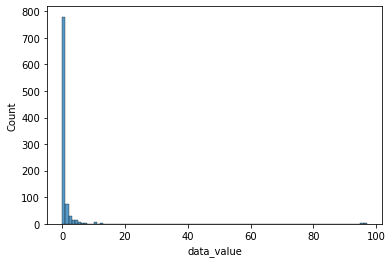

In [ ]:
#plot a histogram of the data for distribution of data
sns.histplot(df4, x="data_value", binwidth=1)

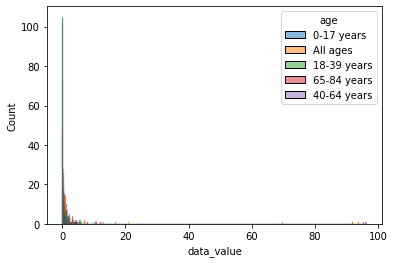

In [ ]:
df8 = df4.replace(to_replace=0, value=None)
sns.histplot(df8, x="data_value", hue="age")

In [ ]:
df4['data_value'].skew()

10.85685224027825

In [ ]:
df4.skew(axis = 1, skipna = True)

0      1.306839
1      1.351357
2      0.678957
3      2.828427
4      2.802787
         ...   
995    0.773774
996    2.826730
997    2.825739
998    2.826843
999    2.726208
Length: 1000, dtype: float64

##5. Value Counts

In [ ]:
df4['response'].value_counts()

Pseudophakia                                        46
Low-tension glaucoma                                37
All Glaucoma                                        35
Secondary glaucoma                                  35
Congenital glaucoma                                 32
                                                    ..
Glaucoma screening                                   2
All Disorders of optic nerve and visual pathways     2
Congenital anomalies                                 2
All Blindness and low vision                         1
Visual field testing                                 1
Name: response, Length: 120, dtype: int64

## #6) Quartile ranges (.25, .50, .75)

In [ ]:
df4['data_value'].describe()

count    945.000000
mean       1.361672
std        8.008589
min        0.000000
25%        0.000000
50%        0.090000
75%        0.560000
max       96.400000
Name: data_value, dtype: float64

## 7) Create at least 2 visualizations that help the reader understand your dataset

In [ ]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 85 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
df4.value_counts('riskfactor')

riskfactor
Diabetes                                 437
Hypertension                             348
All patients                             168
Diabetic retinopathy                       9
Diabetes and diabetic retinopathy          8
Glaucoma                                   6
Hypertension and diabetic retinopathy      4
Cataract                                   4
Hypertension and glaucoma                  3
Diabetes and glaucoma                      3
Diabetes and cataract                      3
Hypertension and AMD                       2
Diabetes and AMD                           2
Age-related macular degeneration           2
Hypertension and cataract                  1
dtype: int64

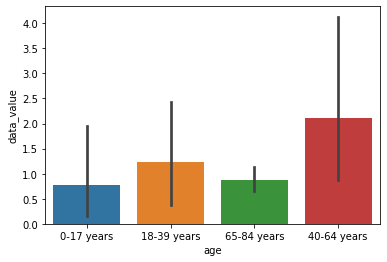

In [ ]:
df5 = df4[df4['age'] != 'All ages']

sns.barplot(data=df5, x='age', y="data_value")

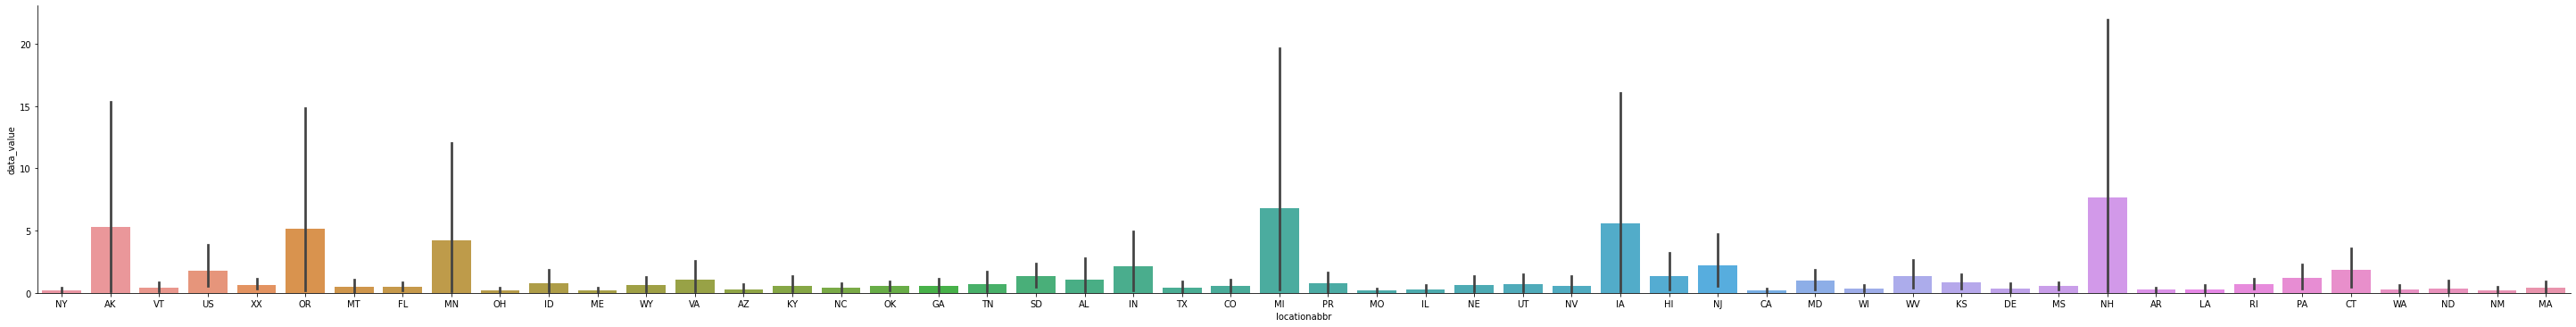

In [ ]:
g = sns.catplot(data=df4, x='locationabbr', y="data_value", aspect= 8, kind= "bar")

In [ ]:
df6 = df4[df4['riskfactor'] != 'All patients']
fig = px.bar(df6, x='riskfactor', y='data_value', color='riskfactor', template="plotly_dark")
fig.show()

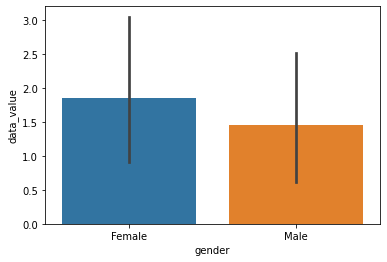

In [ ]:
df7 = df4[df4['gender'] != 'All genders']

sns.barplot(data=df7, x='gender', y="data_value")

In [ ]:
#Attempt at a pivot table to view prevalence(%) of vision-related per state based on risk factor
pd.pivot_table(df4, values='data_value', index=['locationabbr'],
               columns=['riskfactor'], aggfunc= np.sum)

In [ ]:
df4['data_value'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0.00
1      0.00
2      0.00
3      0.02
4      0.04
       ... 
995    1.96
996    0.79
997    0.21
998    0.20
999    0.01
Name: data_value, Length: 1000, dtype: float64>

# ##### PART 3

1. Please describe the purpose of this dataset, and what reach row represents?


The purpose of this data set is to represent the indicators or prevalence of vision/eye-related diseases in correlation to risk factors, categories of gender, and race/ethnicity.


2. How many features and observations are in the dataset? 



There are 35 columns to categorize the data and 1000 rows in this dataset.


3. What ‘problems' exist with the dataset? 


One 'problem is that there were 55 missing data points for the data_value column within the dataset 


4. Is the variable X {select a variable} normally distributed? If not, how is it distributed?




For the data_value, which represents prevalence(%) , the histogram represents a right skew distribution
